In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pip uninstall tensorflow --y

Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949


In [ ]:
pip uninstall keras  --y

Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Successfully uninstalled keras-2.8.0


In [ ]:
pip install tensorflow==1.15.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 19 kB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
     |████████████████████████████████| 503 kB 59.1 MB/s 
     |████████████████████████████████| 3.8 MB 60.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=94a803d0e49c91a70699de2e887171c0886cd859b1da6d453844df1463485322
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

In [ ]:
pip install keras==2.2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 312 kB 18.9 MB/s 


In [ ]:
pip install tensorflow-gpu==1.15.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410.9 MB 32 kB/s 


In [ ]:
import tensorflow as tf
import tensorflow.keras as kr
print(tf.__version__)
print(kr.__version__)

1.15.2
2.2.4-tf


In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 137.67 MiB | 39.96 MiB/s, done.
Resolving deltas: 100% (558/558), done.


In [ ]:
cd Mask_RCNN

/content/Mask_RCNN


In [ ]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'ma

In [ ]:
pip show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg
Requires: 
Required-by: 


go to this path on an editor inside of colab; /usr/local/lib/python3.7/dist-packages/keras/engine/saving.py

and remove the following line of code: ".decode('utf8')"  from line 550, 555, 1083 and 1087. save the .py file by doing ctrl + s and finally, restart the kernel.

## Loading in Annotation files

In [ ]:
from xml.etree import ElementTree
from os import listdir
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
def extract_boxes(filename):
    # load and parse the file
    tree = ElementTree.parse(filename)
    # get the root of the document
    root = tree.getroot()
    # extract each bounding box
    boxes = list()
    for box in root.findall('.//bndbox'):
      xmin = int(box.find('xmin').text)
      ymin = int(box.find('ymin').text)
      xmax = int(box.find('xmax').text)
      ymax = int(box.find('ymax').text)
      coors = [xmin, ymin, xmax, ymax]
      boxes.append(coors)
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height

In [ ]:
# extract details form annotation file
boxes, w, h = extract_boxes('/content/drive/MyDrive/PolesTrial/annotations/pole.030.xml')
# summarize extracted details
print(boxes, w, h)

[[301, 81, 349, 271], [137, 1, 198, 270], [3, 1, 37, 259]] 640 480


## Loading the dataset

In [ ]:
class PolesData(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, is_train=True):
        #define one class
        self.add_class('dataset',1, 'PolesTrial')
        # define data locations
        images_dir = dataset_dir + '/poles/'
        annotations_dir = dataset_dir + '/annotations/'
        # find all images
        for filename in listdir(images_dir):
            # extract image id
            image_id = filename[:-4]
            # skip all images after 150 if we are building the train set
            if is_train and int(image_id[-3:]) >= 868:
              continue
            # skip all images before 150 if we are building the test/val set
            if not is_train and int(image_id[-3:]) < 868:
              continue
            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'
            # add to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)

    def extract_boxes(self, filename):
        # load and parse the file
        tree = ElementTree.parse(filename)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = list()
        for box in root.findall('.//bndbox'):
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height

  # load the masks for an image
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # define box file location
        path = info['annotation']
        # load XML
        boxes, w, h = self.extract_boxes(path)
        # create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        # create masks
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('PolesTrial'))
        return masks, asarray(class_ids, dtype='int32')

  
    # load an image reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']



In [ ]:
# train set
train_set = PolesData()
train_set.load_dataset('/content/drive/MyDrive/PolesTrial', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
 
# test/val set
test_set = PolesData()
test_set.load_dataset('/content/drive/MyDrive/PolesTrial', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Train: 30
Test: 5


## Testing the data loader

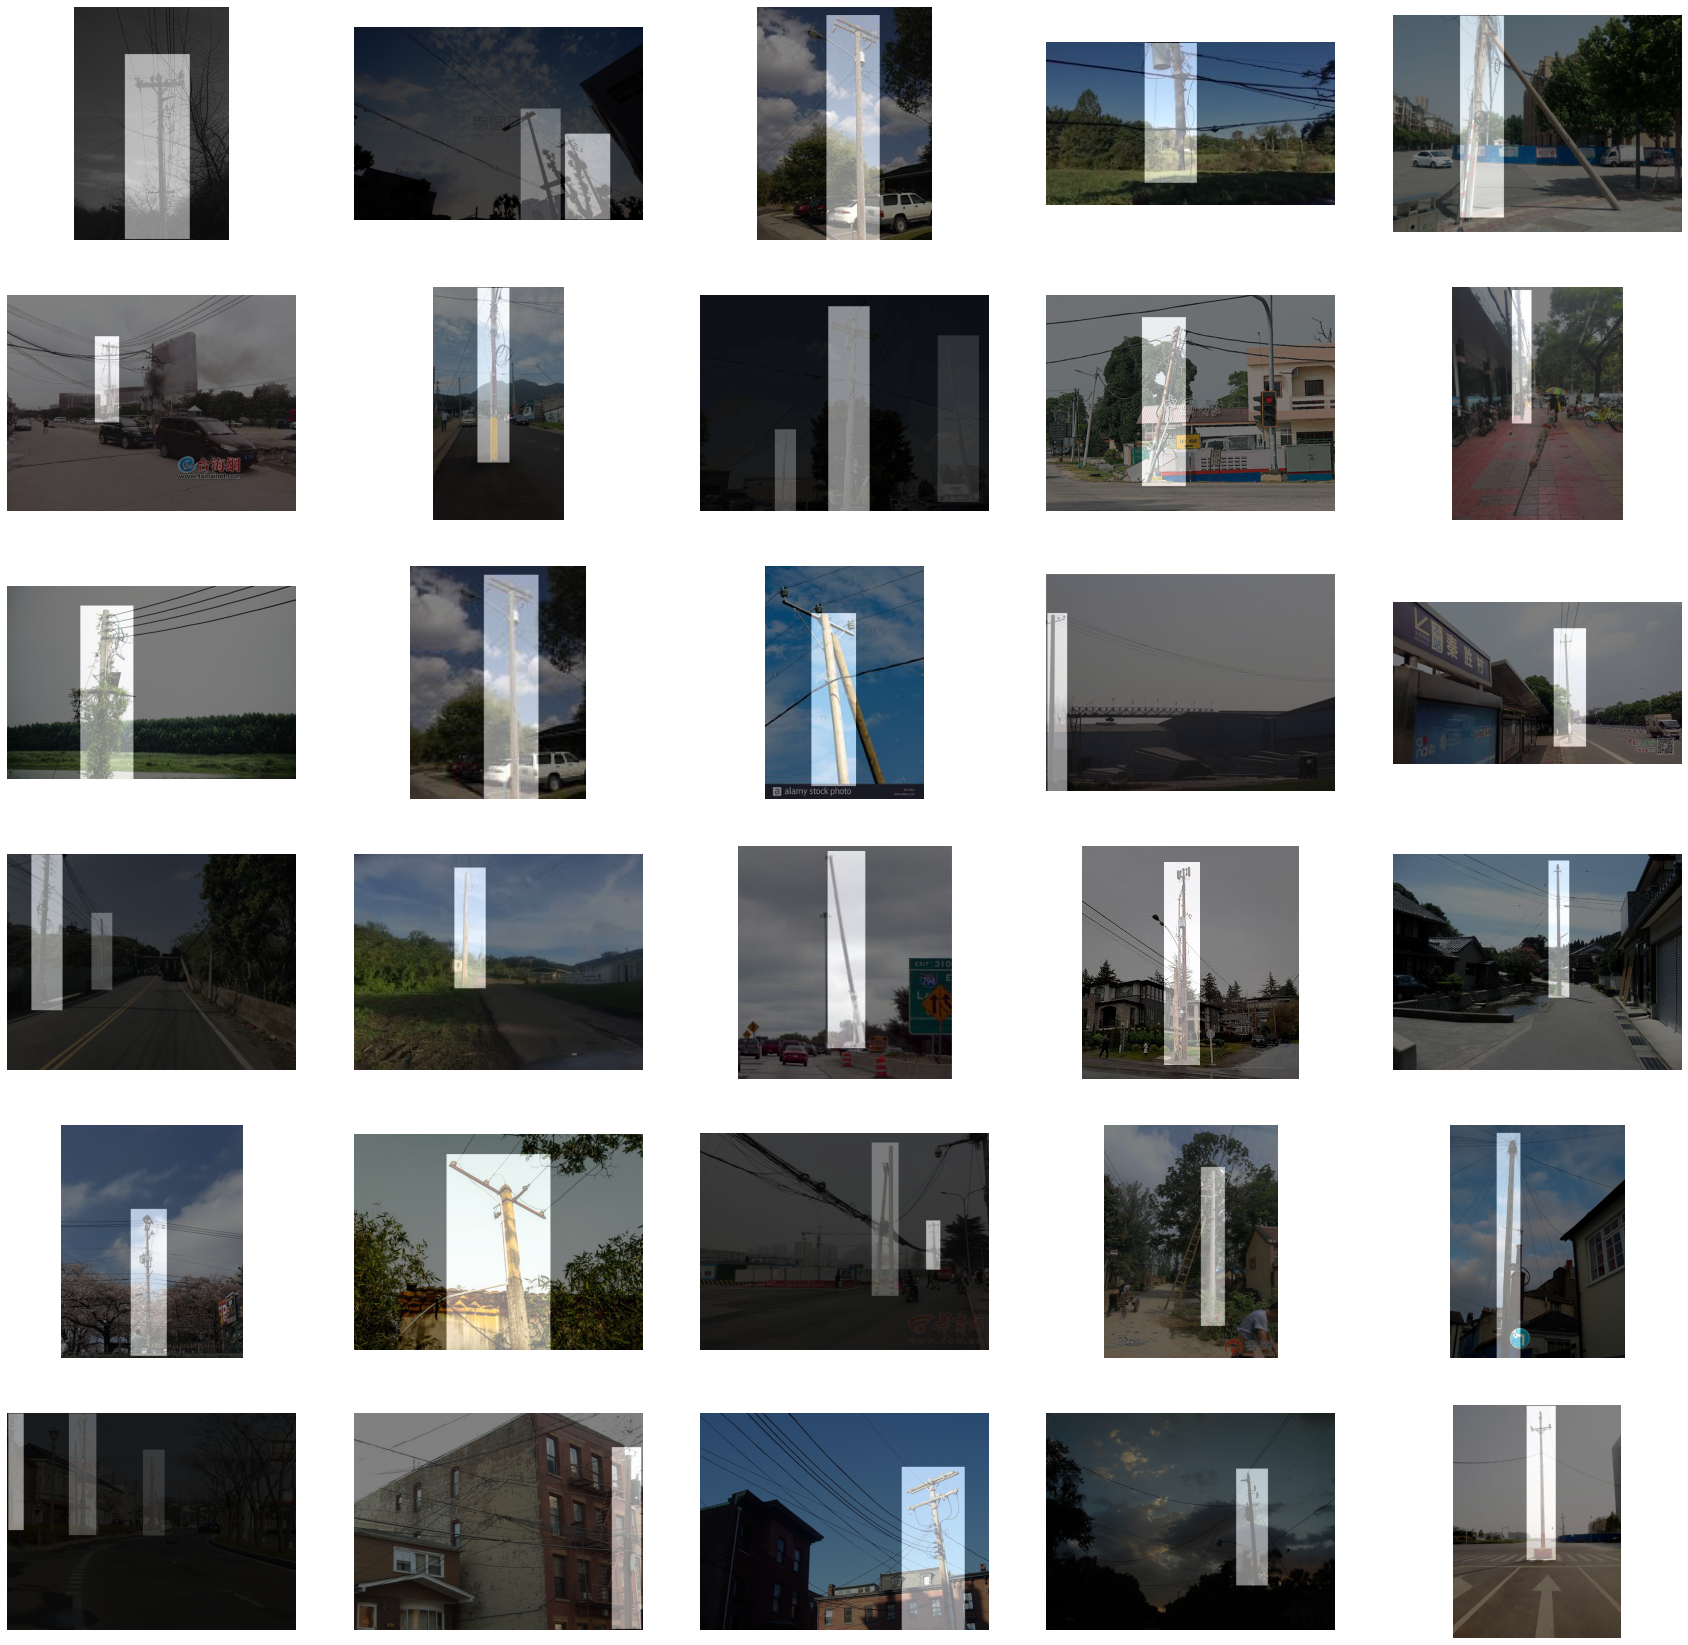

In [ ]:
fig = plt.gcf()
nrows = 6
ncols = 5
fig.set_size_inches(30, 30)
for i in range(30):
  # Set up subplot; subplot indices start at 
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  image = train_set.load_image(i)
  mask, class_ids = train_set.load_mask(i)
  plt.imshow(image)
  for j in range(mask.shape[2]):
	  plt.imshow(mask[:, :, j], cmap='gray', alpha=0.5)
  #plt.imshow(mask[:, :, 0], cmap='gray', alpha=0.5)

plt.show()

In [ ]:
for image_id in train_set.image_ids:
	# load image info
	info = train_set.image_info[image_id]
	# display on the console
	print(info)

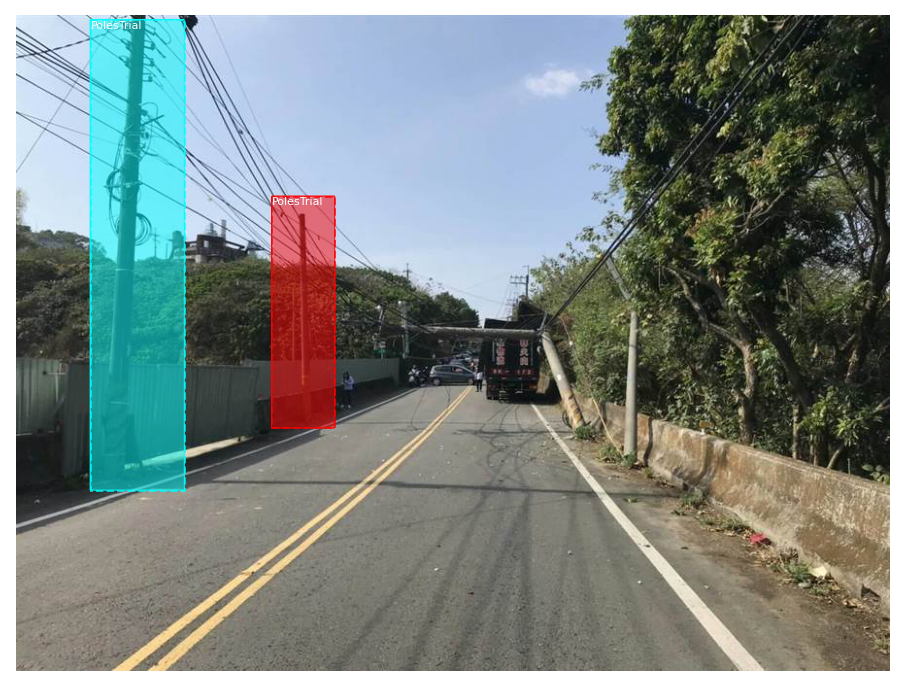

In [ ]:
from mrcnn.utils import extract_bboxes
from mrcnn.visualize import display_instances
image_id = 15
# load the image
image = train_set.load_image(image_id)
# load the masks and the class ids
mask, class_ids = train_set.load_mask(image_id)
# extract bounding boxes from the masks
bbox = extract_bboxes(mask)
# display image with masks and bounding boxes
display_instances(image, bbox, mask, class_ids, train_set.class_names)

## Training the RCNN

In [ ]:
from mrcnn.config import Config
class PolesTrialConfig(Config):
    NAME = "PolesTrial_cfg"
    # Number of classes (background + poles)
    NUM_CLASSES = 1 + 1
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 30

In [ ]:
# prepare config
from mrcnn.model import MaskRCNN
conf = PolesTrialConfig()
directory = '/content/drive/MyDrive/PolesTrial/'
model = MaskRCNN(mode='training', model_dir= directory, config=conf)
# load weights (mscoco)
model.load_weights(filepath = directory+'mask_rcnn_coco.h5', by_name=True, 
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",
                            "mrcnn_bbox", "mrcnn_mask"])

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
# train weights (output layers or 'heads')
model.train(train_set, test_set,
            learning_rate=conf.LEARNING_RATE,
            epochs=5, layers='all')
model_path = directory + 'poles_rcnn.h5'
model.keras_model.save_weights(model_path)

## Making Predictions

In [ ]:
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
directory = '/content/drive/MyDrive/PolesTrial/'
class PredictionConfig(Config):
    NAME = "PolesTrial_cfg"
    # Number of classes (background + poles)
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1

Using TensorFlow backend.


In [ ]:
confg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir=directory, config=confg)
weight_path = "/content/drive/MyDrive/PolesTrial/polestrial_cfg20220719T0952/mask_rcnn_polestrial_cfg_0004.h5"
# load model weights
model.load_weights(weight_path, by_name=True)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.






Re-starting from epoch 4


## Evaluating the performance Using MAP

The performance of a model for an object recognition task is often evaluated using the mean absolute precision, or mAP.

We are predicting bounding boxes so we can determine whether a bounding box prediction is good or not based on how well the predicted and actual bounding boxes overlap. This can be calculated by dividing the area of the overlap by the total area of both bounding boxes, or the intersection divided by the union, referred to as “intersection over union,” or IoU. A perfect bounding box prediction will have an IoU of 1.

It is standard to assume a positive prediction of a bounding box if the IoU is greater than 0.5, e.g. they overlap by 50% or more.

Precision refers to the percentage of the correctly predicted bounding boxes (IoU > 0.5) out of all bounding boxes predicted. Recall is the percentage of the correctly predicted bounding boxes (IoU > 0.5) out of all objects in the photo.

As we make more predictions, the recall percentage will increase, but precision will drop or become erratic as we start making false positive predictions. The recall (x) can be plotted against the precision (y) for each number of predictions to create a curve or line. We can maximize the value of each point on this line and calculate the average value of the precision or AP for each value of recall.

The mask-rcnn library provides a mrcnn.utils.compute_ap to calculate the AP and other metrics for a given images. These AP scores can be collected across a dataset and the mean calculated to give an idea at how good the model is at detecting objects in a dataset.

In [ ]:
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
from numpy import expand_dims
from mrcnn.utils import compute_ap
from numpy import mean
def evaluate_model(dataset, model, cfg):
    APs = list()
    for image_id in dataset.image_ids:
        # load image, bounding boxes and masks for the image id
        image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, confg, image_id, use_mini_mask=False)
        # convert pixel values (e.g. center)
        scaled_image = mold_image(image, confg)
        # convert image into one sample
        sample = expand_dims(scaled_image, 0)
        # make prediction
        yhat = model.detect(sample, verbose=0)
        # extract results for first sample
        r = yhat[0]
        # calculate statistics, including AP
        AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
        # store
        APs.append(AP)
    # calculate the mean AP across all images
    mAP = mean(APs)
    return mAP

In [ ]:
train_mAP = evaluate_model(train_set, model, confg)
print("Train mAP: %.3f" % train_mAP)
# evaluate model on test dataset
test_mAP = evaluate_model(test_set, model, confg)
print("Test mAP: %.3f" % test_mAP)

Train mAP: 0.917
Test mAP: 0.500


## Testing Using Data in The Validation Set

In [ ]:
# plot_actual_vs_predicted(test_set, model, confg)

In [ ]:
image_id = 0
image = test_set.load_image(image_id)
mask, _ = test_set.load_mask(image_id)
# convert pixel values (e.g. center)
scaled_image = mold_image(image, confg)
# convert image into one sample
sample = expand_dims(scaled_image, 0)
# make prediction
yhat = model.detect(sample, verbose=0)[0]

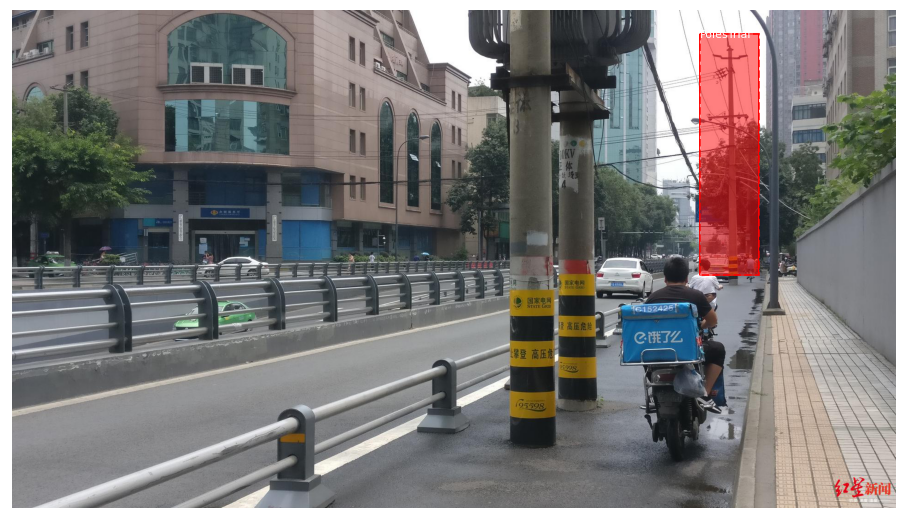

In [ ]:
from mrcnn.utils import extract_bboxes
from mrcnn.visualize import display_instances
# load the image
image = test_set.load_image(image_id)
# load the masks and the class ids
mask, class_ids = test_set.load_mask(image_id)
# extract bounding boxes from the masks
bbox = extract_bboxes(mask)
# display image with masks and bounding boxes
display_instances(image, bbox, mask, class_ids, test_set.class_names)

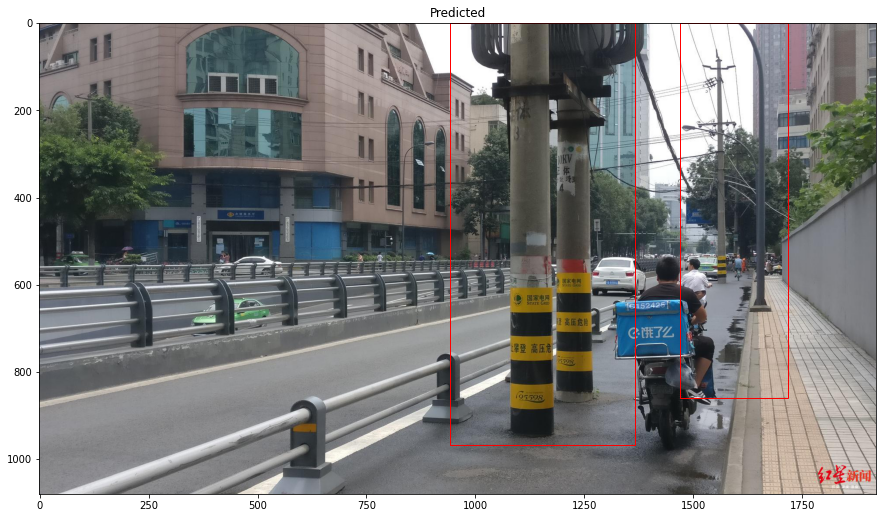

In [ ]:
from matplotlib.patches import Rectangle
plt.figure(figsize=(15,15))
for j in range(mask.shape[2]):
  plt.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
# get the context for drawing boxes
plt.imshow(image)
plt.title('Predicted')
ax = plt.gca()
# plot each box
for box in yhat['rois']:
  # get coordinates
  y1, x1, y2, x2 = box
  # calculate width and height of the box
  width, height = x2 - x1, y2 - y1
  # create the shape
  rect = Rectangle((x1, y1), width, height, fill=False, color='red')
  # draw the box
  ax.add_patch(rect)
# show the figure
plt.show()

## Using Random Images from the Web

In [ ]:
from mrcnn.utils import Dataset
import matplotlib.pyplot as plt
from os import listdir
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
from numpy import expand_dims
from mrcnn.utils import extract_bboxes
from mrcnn.visualize import display_instances
from matplotlib.patches import Rectangle

class RandomImage(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir):
        #define one class
        self.add_class('dataset',1, 'PolesTrial')
        # define data locations
        images_dir = dataset_dir + '/'
       # annotations_dir = dataset_dir + '/annotations/'
        # find all images
        for image_id in listdir(images_dir):
            # extract image id
            image_id = image_id
    
            img_path = images_dir + image_id
           # ann_path = annotations_dir + image_id + '.xml'
            # add to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=None)
      


images = RandomImage()
images.load_dataset('/content/drive/MyDrive/PolesTrial/testing_images')
images.prepare()
print('Images: %d' % len(images.image_ids))

Images: 18


In [ ]:
image_id = 7
image = images.load_image(image_id)
scaled_image = mold_image(image, confg)
# convert image into one sample
sample = expand_dims(scaled_image, 0)
# make prediction
yhat = model.detect(sample, verbose=0)[0]
# mask, class_ids = images.load_mask(image_id)
# # extract bounding boxes from the masks
# bbox = extract_bboxes(mask)
# # display image with masks and bounding boxes
# display_instances(image, bbox, mask, class_ids, images.class_names)

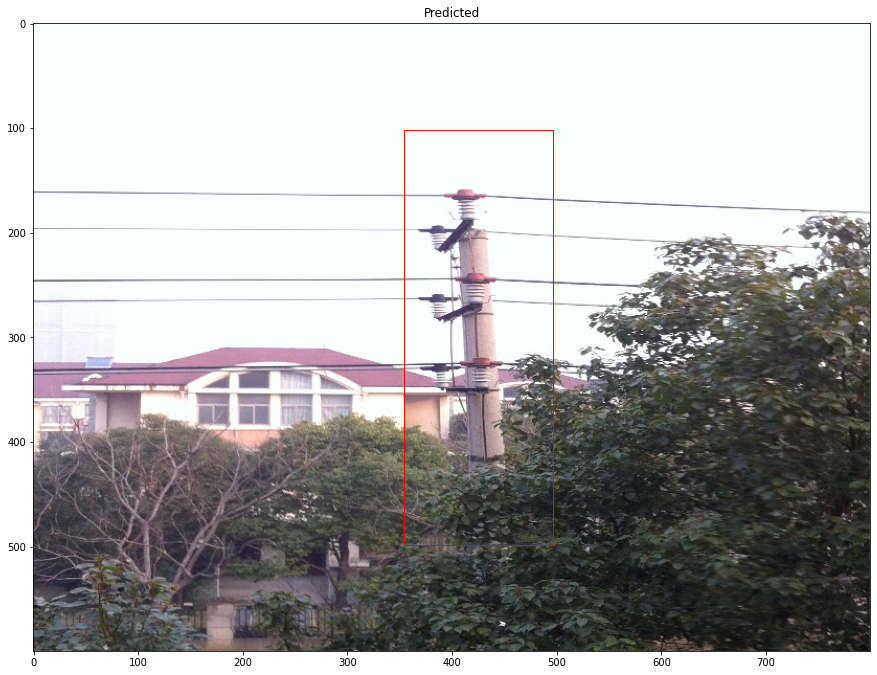

In [ ]:
plt.figure(figsize=(15,15))
for j in range(mask.shape[2]):
  plt.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
# get the context for drawing boxes
plt.imshow(image)
plt.title('Predicted')
ax = plt.gca()
# plot each box
for box in yhat['rois']:
  # get coordinates
  y1, x1, y2, x2 = box
  # calculate width and height of the box
  width, height = x2 - x1, y2 - y1
  # create the shape
  rect = Rectangle((x1, y1), width, height, fill=False, color='red')
  # draw the box
  ax.add_patch(rect)
# show the figure
plt.show()